In [1]:
# 1)ARTIFICIAL NEURAL NETWORK (BACKPROPOGATION)
import numpy as np
X = np.array(([2, 9], [1, 5], [3, 6]), dtype=float)
y = np.array(([92], [86], [89]), dtype=float)
X = X/np.amax(X,axis=0) # maximum of X array longitudinally
y = y/100

#Sigmoid Function
def sigmoid (x):
    return 1/(1 + np.exp(-x))

#Derivative of Sigmoid Function
def derivatives_sigmoid(x):
    return x * (1 - x)

#Variable initialization
epoch=7000      #Setting training iterations
lr=0.1          #Setting learning rate
inputlayer_neurons = 2     #number of features in data set
hiddenlayer_neurons = 3     #number of hidden layers neurons
output_neurons = 1     #number of neurons at output layer

#weight and bias initialization
wh=np.random.uniform(size=(inputlayer_neurons,hiddenlayer_neurons))
bh=np.random.uniform(size=(1,hiddenlayer_neurons))
wout=np.random.uniform(size=(hiddenlayer_neurons,output_neurons))
bout=np.random.uniform(size=(1,output_neurons))

#draws a random range of numbers uniformly of dim x*y
for i in range(epoch):
    hinp1=np.dot(X,wh)
    hinp=hinp1 + bh
    hlayer_act = sigmoid(hinp)
    outinp1=np.dot(hlayer_act,wout)
    outinp= outinp1+ bout
    output = sigmoid(outinp)


EO = y-output
outgrad = derivatives_sigmoid(output)
d_output = EO* outgrad
EH = d_output.dot(wout.T)
hiddengrad = derivatives_sigmoid(hlayer_act) #how much hidden layer wts contributed to error
d_hiddenlayer = EH * hiddengrad
wout += hlayer_act.T.dot(d_output) *lr # dotproduct of nextlayererror and currentlayerop
wh += X.T.dot(d_hiddenlayer) *lr
     #bh += np.sum(d_hiddenlayer, axis=0,keepdims=True) *lr
print("Input: \n" + str(X))
print("Actual Output: \n" + str(y))
print("Predicted Output: \n",output)

Input: 
[[0.66666667 1.        ]
 [0.33333333 0.55555556]
 [1.         0.66666667]]
Actual Output: 
[[0.92]
 [0.86]
 [0.89]]
Predicted Output: 
 [[0.83845325]
 [0.82836026]
 [0.8366272 ]]


In [50]:
# 2)LOGISTIC REGRESSION
import numpy as nm
import matplotlib.pyplot as mtp
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn import metrics
import numpy as np


#importing datasets
data_set= pd.read_csv('User_Data.csv')      #400 rows × 5 columns


#Extracting Independent and dependent Variable
x= data_set.iloc[:, [2,3]].values
y= data_set.iloc[:, 4].values

# Splitting the dataset into training and test set.
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size= 0.25, random_state=0)

#feature Scaling
st_x= StandardScaler()
x_train1= st_x.fit_transform(x_train)
x_test1= st_x.transform(x_test)


#Fitting Logistic Regression to the training set
classifier= LogisticRegression(random_state=0)
classifier.fit(x_train1, y_train)
LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
intercept_scaling=1, l1_ratio=None, max_iter=100,
multi_class='warn', n_jobs=None, penalty='l2',
random_state=0, solver='warn', tol=0.0001, verbose=0,
warm_start=False)

#Predicting the test set result
y_pred= classifier.predict(x_test1)
print(y_pred)

[0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 1 0 0 1 0 1 0 1 0 0 0 0 0 0 1 0 0 0 0
 0 0 1 0 0 0 0 1 0 0 1 0 1 1 0 0 0 1 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 1 0 0 0
 0 0 1 0 1 1 1 1 0 0 1 1 0 1 0 0 0 1 0 0 0 0 0 0 1 1]


In [51]:
#Creating the Confusion matrix
cm= confusion_matrix(y_test, y_pred)
print("Confusion Matrix : \n",cm)

Confusion Matrix : 
 [[65  3]
 [ 8 24]]


In [52]:
print ("Accuracy : ", accuracy_score(y_test, y_pred))   #Accuracy  0.89

Accuracy :  0.89


In [55]:
from sklearn import metrics
import numpy as np

y_pred=np.around(classifier.predict(x_test1))
print(metrics.classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.89      0.96      0.92        68
           1       0.89      0.75      0.81        32

    accuracy                           0.89       100
   macro avg       0.89      0.85      0.87       100
weighted avg       0.89      0.89      0.89       100



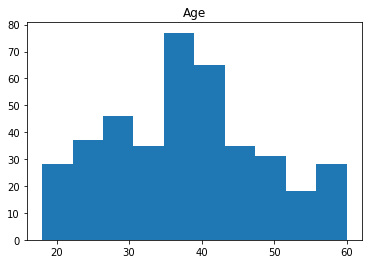

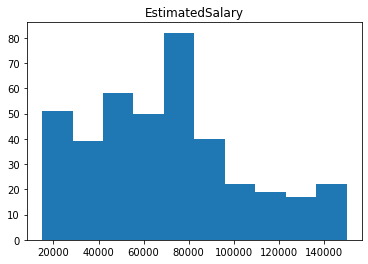

In [56]:
plt.title("Age")
plt.hist(data_set.Age)
plt.show()
plt.title("EstimatedSalary")
plt.hist(data_set.EstimatedSalary)
plt.show()


(array([[10., 12., 16., 14., 11., 12.,  9.,  5.,  4.,  7.],
        [ 1., 11., 12., 20.,  8., 31.,  4.,  4.,  3.,  6.]]),
 array([-1.99318916, -1.56071704, -1.12824493, -0.69577281, -0.26330069,
         0.16917142,  0.60164354,  1.03411565,  1.46658777,  1.89905989,
         2.331532  ]),
 <a list of 2 BarContainer objects>)

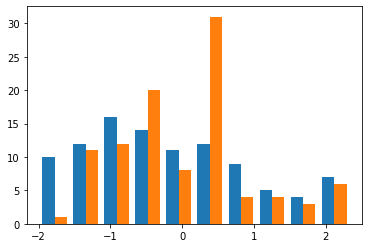

In [58]:
plt.hist(x_test1)

(array([[18., 25., 41., 42., 49., 40., 38., 18., 16., 13.],
        [ 3., 42., 39., 46., 61., 43., 13., 21., 16., 16.]]),
 array([-1.99318916, -1.56071704, -1.12824493, -0.69577281, -0.26330069,
         0.16917142,  0.60164354,  1.03411565,  1.46658777,  1.89905989,
         2.331532  ]),
 <a list of 2 BarContainer objects>)

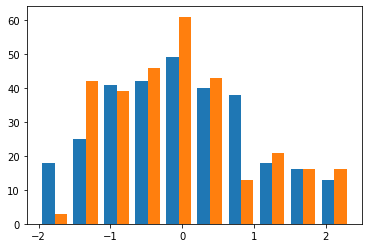

In [60]:
plt.hist(x_train1)

In [61]:
# 3)KNN CLASSIFIER
# importing libraries
import numpy as nm
import matplotlib.pyplot as mtp
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

#importing datasets
data_set= pd.read_csv('User_Data.csv')

#Extracting Independent and dependent Variable
x= data_set.iloc[:, [2,3]].values
y= data_set.iloc[:, 4].values

# Splitting the dataset into training and test set.
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size= 0.25, random_state=0)

#feature Scaling
st_x= StandardScaler()
x_train1= st_x.fit_transform(x_train)
x_test1= st_x.transform(x_test)

#Fitting K-NN classifier to the training set
classifier= KNeighborsClassifier(n_neighbors=5, metric='minkowski',p=2)
classifier.fit(x_train1, y_train)

KNeighborsClassifier()

In [62]:
KNeighborsClassifier()
#Predicting the test set result
y_pred= classifier.predict(x_test1)

#Creating the Confusion matrix
cm= confusion_matrix(y_test, y_pred)
print("Confusion Matrix : \n",cm)

Confusion Matrix : 
 [[64  4]
 [ 3 29]]


In [63]:
print ("Accuracy : ", accuracy_score(y_test, y_pred))

Accuracy :  0.93


In [64]:
from sklearn import metrics
import numpy as np

y_pred=np.around(classifier.predict(x_test1))
print(metrics.classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.96      0.94      0.95        68
           1       0.88      0.91      0.89        32

    accuracy                           0.93       100
   macro avg       0.92      0.92      0.92       100
weighted avg       0.93      0.93      0.93       100



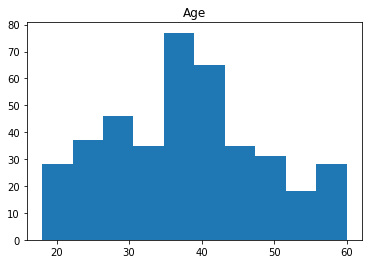

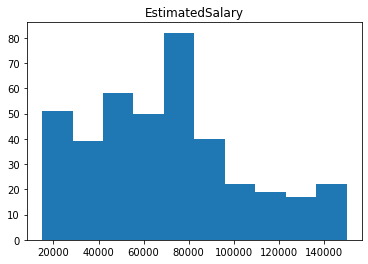

In [65]:
plt.title("Age")
plt.hist(data_set.Age)
plt.show()
plt.title("EstimatedSalary")
plt.hist(data_set.EstimatedSalary)
plt.show()

(array([[10., 12., 16., 14., 11., 12.,  9.,  5.,  4.,  7.],
        [ 1., 11., 12., 20.,  8., 31.,  4.,  4.,  3.,  6.]]),
 array([-1.99318916, -1.56071704, -1.12824493, -0.69577281, -0.26330069,
         0.16917142,  0.60164354,  1.03411565,  1.46658777,  1.89905989,
         2.331532  ]),
 <a list of 2 BarContainer objects>)

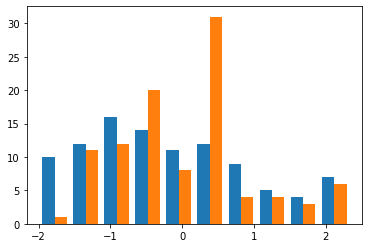

In [67]:
plt.hist(x_test1)

(array([[18., 25., 41., 42., 49., 40., 38., 18., 16., 13.],
        [ 3., 42., 39., 46., 61., 43., 13., 21., 16., 16.]]),
 array([-1.99318916, -1.56071704, -1.12824493, -0.69577281, -0.26330069,
         0.16917142,  0.60164354,  1.03411565,  1.46658777,  1.89905989,
         2.331532  ]),
 <a list of 2 BarContainer objects>)

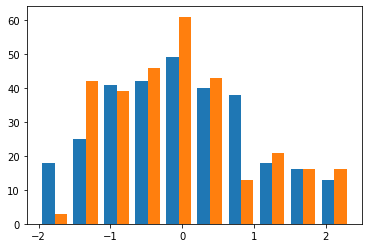

In [68]:
plt.hist(x_train1)

In [24]:
# 4)SVM CLASSIFIER
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import SVC

fruits = pd.read_table('fruit_data_with_colors.txt')
feature_names = ['mass', 'width', 'height', 'color_score']
X = fruits[feature_names]
Y = fruits['fruit_label']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y)
X_train = MinMaxScaler().fit_transform(X_train)
X_test = MinMaxScaler().fit_transform(X_test)

svm = SVC().fit(X_train, Y_train)

print('Accuracy of SVM classifier on training set : {:.2f}'
      .format(svm.score(X_train, Y_train)))
print('Accuracy of SVM classifier on testing set : {:.2f}'
      .format(svm.score(X_test, Y_test)))

Accuracy of SVM classifier on training set : 0.95
Accuracy of SVM classifier on testing set : 0.73


In [72]:
# 5)DECISION TREEE
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.tree import DecisionTreeClassifier

fruits = pd.read_table('fruit_data_with_colors.txt')
feature_names = ['mass', 'width', 'height', 'color_score']   #all attributes

X = fruits[feature_names]
y = fruits['fruit_label']                                # y only label

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
scaler = MinMaxScaler()
X_train1 = scaler.fit_transform(X_train)
X_test1 = scaler.transform(X_test)

# Decision Tree classifier
clf = DecisionTreeClassifier().fit(X_train1, y_train)
print('Accuracy of Decision Tree classifier on training set: {:.2f}'.format(clf.score(X_train1, y_train)))
print('Accuracy of Decision Tree classifier on test set: {:.2f}'.format(clf.score(X_test1, y_test)))

Accuracy of Decision Tree classifier on training set: 1.00
Accuracy of Decision Tree classifier on test set: 0.73


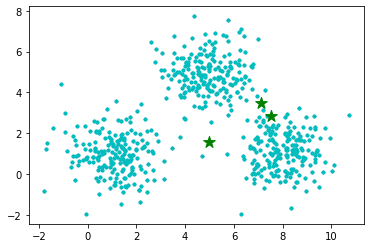

In [15]:
# 6)K-MEANS CLUSTERING
from copy import deepcopy
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from matplotlib import pyplot as plt

# Set three centers, the model should predict similar results
center_1 = np.array([1,1])
center_2 = np.array([5,5])
center_3 = np.array([8,1])

# Generate random data and center it to the three centers
data_1 = np.random.randn(200, 2) + center_1
data_2 = np.random.randn(200,2) + center_2
data_3 = np.random.randn(200,2) + center_3
data = np.concatenate((data_1, data_2, data_3), axis = 0)
plt.scatter(data[:,0], data[:,1], s=7)

# Number of clusters
k = 3

# Number of training data
n = data.shape[0]

# Number of features in the data
c = data.shape[1]

# Generate random centers, here we use sigma and mean to ensure it represent the whole data
mean = np.mean(data, axis = 0)
std = np.std(data, axis = 0)
centers = np.random.randn(k,c)*std + mean

# Plot the data and the centers generated as random
plt.scatter(data[:,0], data[:,1], s=9,color='c')
plt.scatter(centers[:,0], centers[:,1], marker='*', c='g',s=150)
plt.show()